In [3]:
#!pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats

In [34]:
warnings.filterwarnings('ignore')

In [35]:
conn=sqlite3.connect('inventory.db')

In [36]:
df=pd.read_sql("select * from vendor_sales_summary",conn)

In [37]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [12]:
numerical_cols=df.select_dtypes(include=np.number).columns

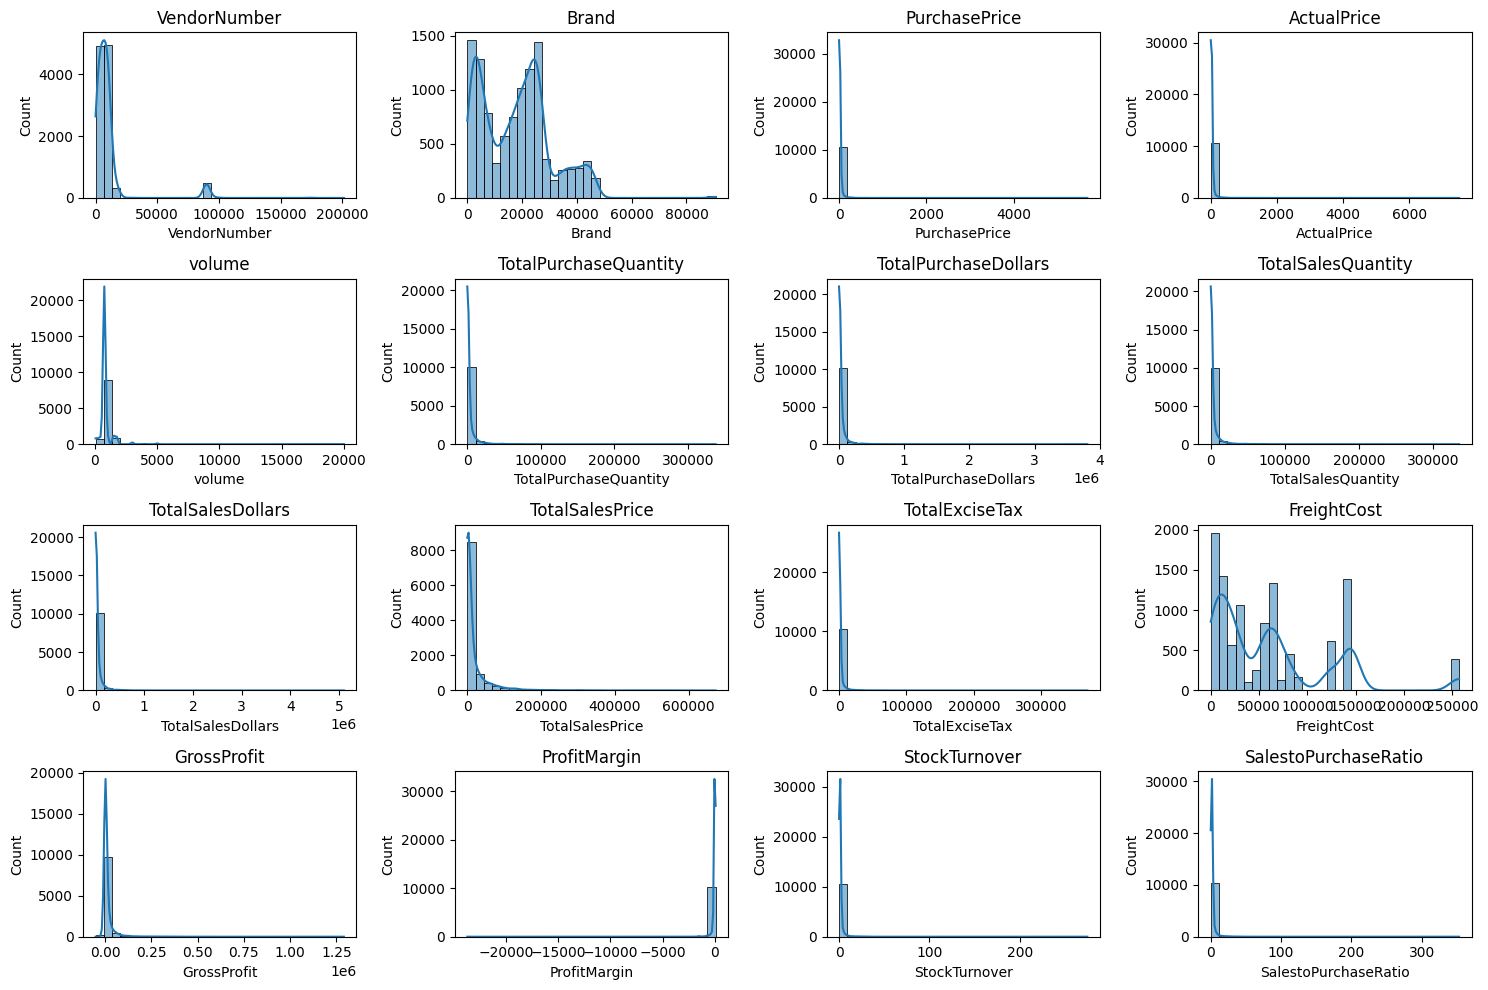

In [14]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #Adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

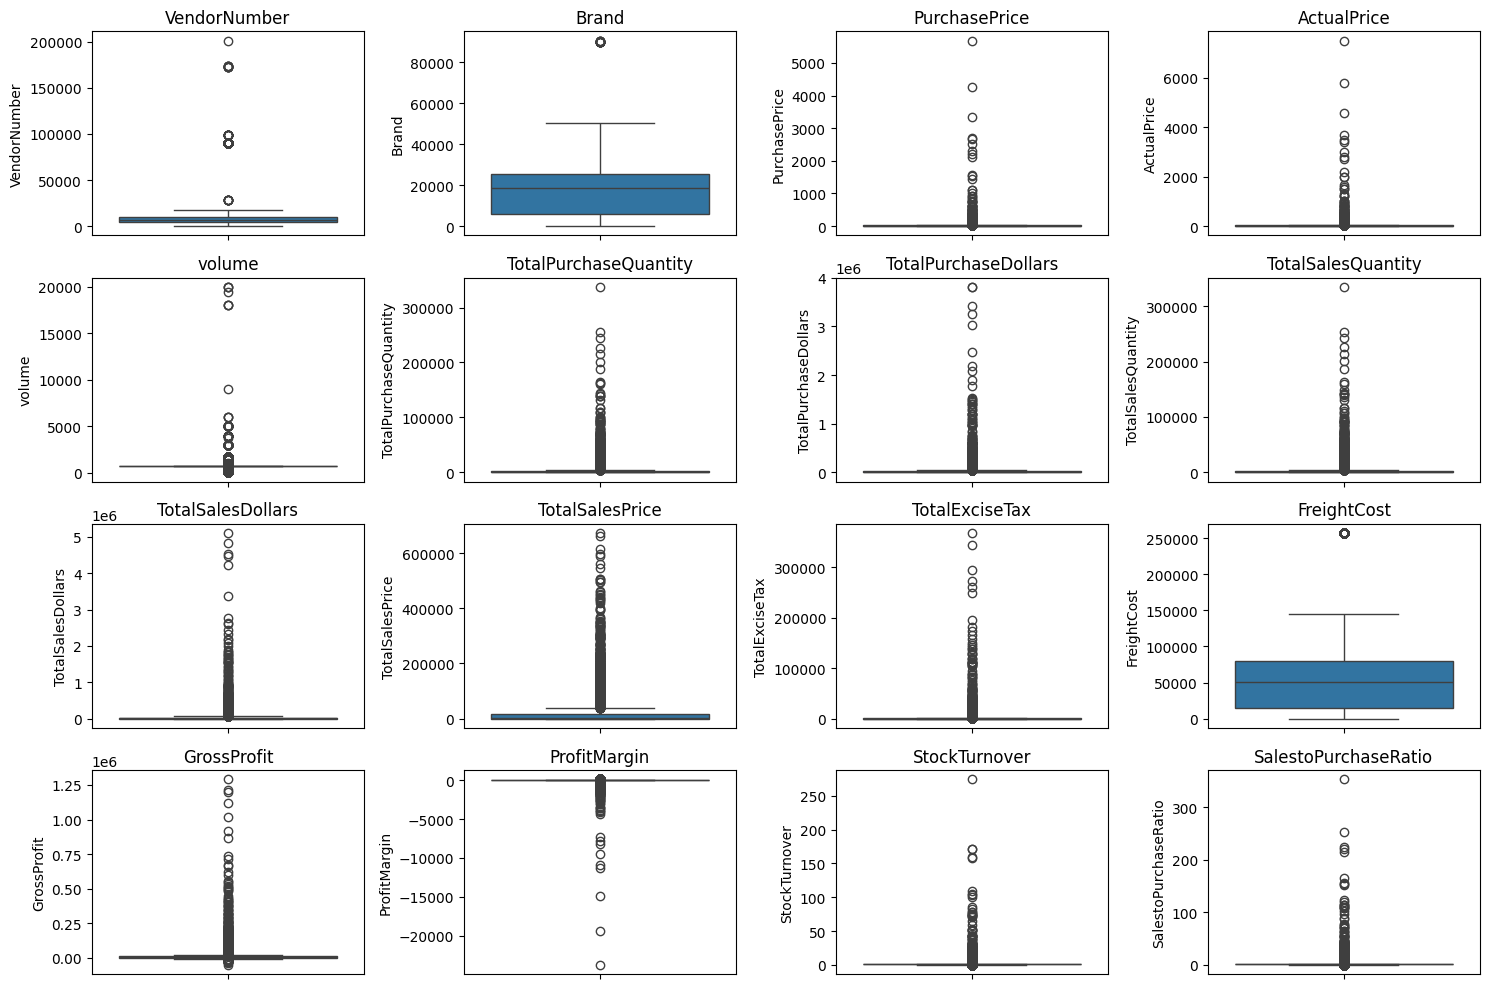

In [16]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

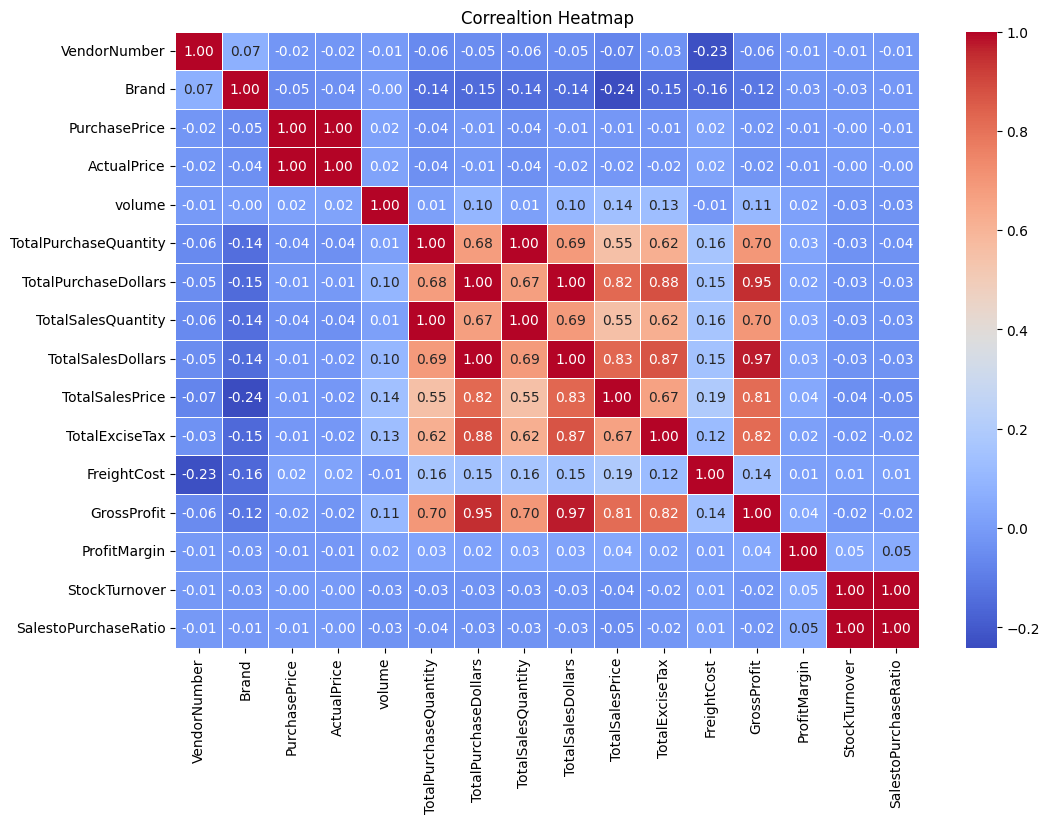

In [17]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correaltion Heatmap")
plt.show()

**Correlation Insights**

**Data Analysis**

Identify Brands that needs Promotional or Pricing Adjustment which exhibit lower sales performance but higher profit margins

In [18]:
brand_perfomance=df.groupby('Description').agg(
    {"TotalSalesDollars":'sum',
        "ProfitMargin":'mean'
    }
).reset_index()

In [19]:
low_sales_threshold=brand_perfomance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_perfomance['ProfitMargin'].quantile(0.85)

In [20]:
low_sales_threshold

np.float64(286.185)

In [21]:
high_margin_threshold

np.float64(56.198056057839054)

In [22]:
target_brands=brand_perfomance[
    (brand_perfomance['TotalSalesDollars']<=low_sales_threshold)&
    (brand_perfomance['ProfitMargin']>=high_margin_threshold)
]
print("Brands with low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
7777,Santa Rita Organic Svgn Bl,9.99,66.466466
2896,Debauchery Pnt Nr,11.58,65.975820
2537,Concannon Glen Ellen Wh Zin,15.95,83.448276
2677,Crown Royal Apple,27.86,89.806174
7818,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
8939,Tommasi Poggio Tufo Cab Svgn,269.73,74.789604
9229,Vigne A Porrona Rosso,272.79,96.825397
5736,Mad Dogs & Englishmen Jumil,279.80,97.666190
3980,Gifft Chardonnay,279.80,94.245890


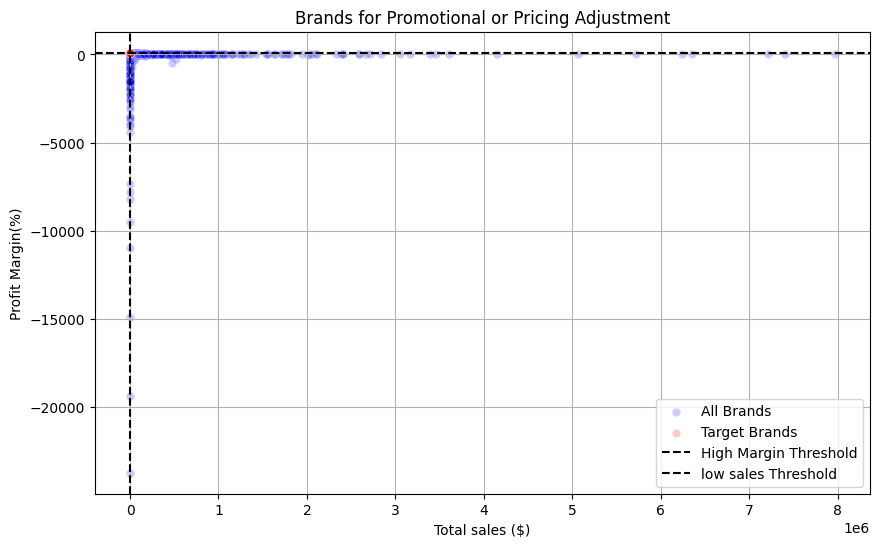

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_perfomance,x='TotalSalesDollars',y='ProfitMargin',color='blue',label='All Brands',alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color='red',label='Target Brands',alpha=0.2)
plt.axhline(high_margin_threshold,linestyle='--',color='black',label='High Margin Threshold')
plt.axvline(low_sales_threshold,linestyle='--',color='black',label='low sales Threshold')
plt.xlabel('Total sales ($)')
plt.ylabel('Profit Margin(%)')
plt.title("Brands for Promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()

Which Vendor and brands demonstrate the highest sales performance?

In [44]:
def format_dollars(value):
    if value>=1_100_000:
        return f"{value/1_000_000:.2f}M"
    elif value>1_000:
        return f'{value/1_000:.2f}k'
    else:
        return str(value)

In [25]:
top_vendors=df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands=df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      68739834.97
MARTIGNETTI COMPANIES         40960117.82
PERNOD RICARD USA             32279544.17
JIM BEAM BRANDS COMPANY       31898621.16
BACARDI USA INC               25005365.79
CONSTELLATION BRANDS INC      24467134.23
E & J GALLO WINERY            18553774.66
BROWN-FORMAN CORP             18476611.60
ULTRA BEVERAGE COMPANY LLP    17802646.10
M S WALKER INC                15436066.26
Name: TotalSalesDollars, dtype: float64

In [26]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [45]:
top_brands.apply(lambda x:format_dollars(x))
#top_brands.columns

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

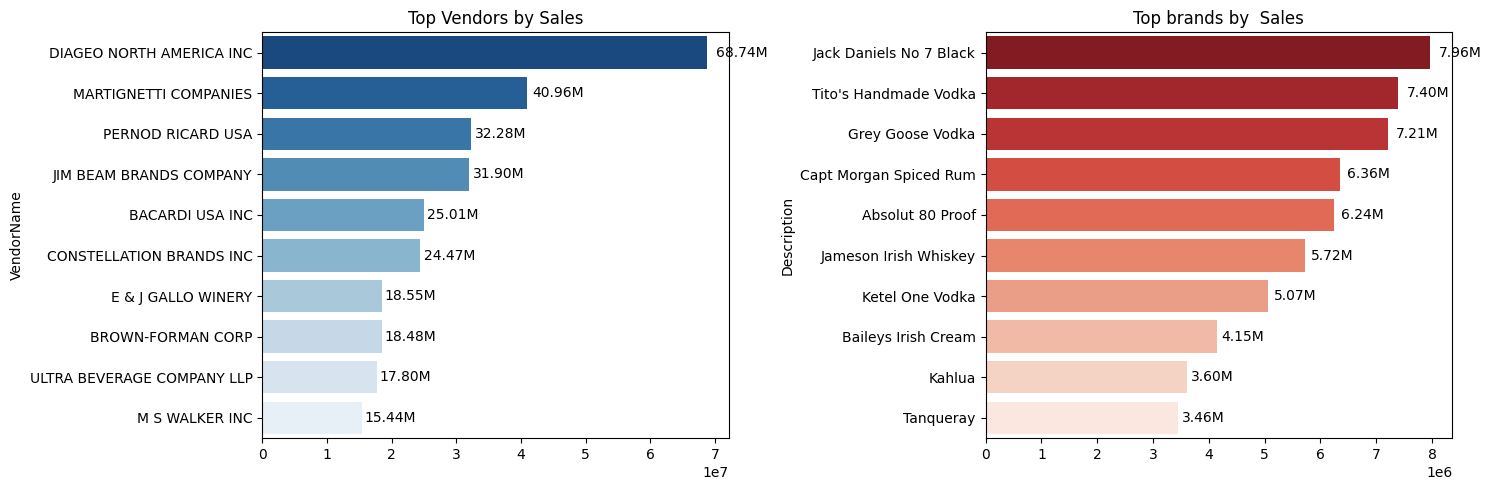

In [50]:
plt.figure(figsize=(15,5))
#plot for top vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index,x=top_vendors.values,palette='Blues_r')
plt.title("Top Vendors by Sales")
for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width()*0.02),
             bar.get_y()+bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')
#plot for top brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index.astype(str),x=top_brands.values,palette='Reds_r')
plt.title("Top brands by  Sales")
for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width()*0.02),
             bar.get_y()+bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')
plt.tight_layout()
plt.show()

**Which Vendors contribute the most  to total purchase dollars**

In [54]:
vendor_performance=df.groupby('VendorName').agg(
    {
        'TotalPurchaseDollars':'sum',
        'GrossProfit':'sum',
        'TotalSalesDollars':'sum'
        
    }
).reset_index()

In [70]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalSalesDollars'].sum()*100

In [71]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
28,DIAGEO NORTH AMERICA INC,50959796.85,17780038.12,68739834.97,11.28
63,MARTIGNETTI COMPANIES,27861690.02,13098427.80,40960117.82,6.17
50,JIM BEAM BRANDS COMPANY,24203151.05,7695470.11,31898621.16,5.36
74,PERNOD RICARD USA,24124091.56,8155452.61,32279544.17,5.34
8,BACARDI USA INC,17624378.72,7380987.07,25005365.79,3.90
...,...,...,...,...,...
36,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
0,AAPER ALCOHOL & CHEMICAL CO,105.07,-105.07,0.00,0.00
91,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
19,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [72]:
top_vendors=vendor_performance.head(10)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(lambda x:format_dollars(x))
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(lambda x:format_dollars(x))
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(lambda x:format_dollars(x))

In [73]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
28,DIAGEO NORTH AMERICA INC,50.96M,17.78M,68.74M,11.28
63,MARTIGNETTI COMPANIES,27.86M,13.10M,40.96M,6.17
50,JIM BEAM BRANDS COMPANY,24.20M,7.70M,31.90M,5.36
74,PERNOD RICARD USA,24.12M,8.16M,32.28M,5.34
8,BACARDI USA INC,17.62M,7.38M,25.01M,3.90
23,CONSTELLATION BRANDS INC,15.57M,8.89M,24.47M,3.45
14,BROWN-FORMAN CORP,13.53M,4.95M,18.48M,3.00
114,ULTRA BEVERAGE COMPANY LLP,13.21M,4.59M,17.80M,2.93
33,E & J GALLO WINERY,12.29M,6.26M,18.55M,2.72
59,M S WALKER INC,10.94M,4.50M,15.44M,2.42


In [74]:
top_vendors['Cumulative_Contribution%']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
28,DIAGEO NORTH AMERICA INC,50.96M,17.78M,68.74M,11.28,11.28
63,MARTIGNETTI COMPANIES,27.86M,13.10M,40.96M,6.17,17.45
50,JIM BEAM BRANDS COMPANY,24.20M,7.70M,31.90M,5.36,22.81
74,PERNOD RICARD USA,24.12M,8.16M,32.28M,5.34,28.15
8,BACARDI USA INC,17.62M,7.38M,25.01M,3.90,32.05
23,CONSTELLATION BRANDS INC,15.57M,8.89M,24.47M,3.45,35.50
14,BROWN-FORMAN CORP,13.53M,4.95M,18.48M,3.00,38.50
114,ULTRA BEVERAGE COMPANY LLP,13.21M,4.59M,17.80M,2.93,41.43
33,E & J GALLO WINERY,12.29M,6.26M,18.55M,2.72,44.15
59,M S WALKER INC,10.94M,4.50M,15.44M,2.42,46.57


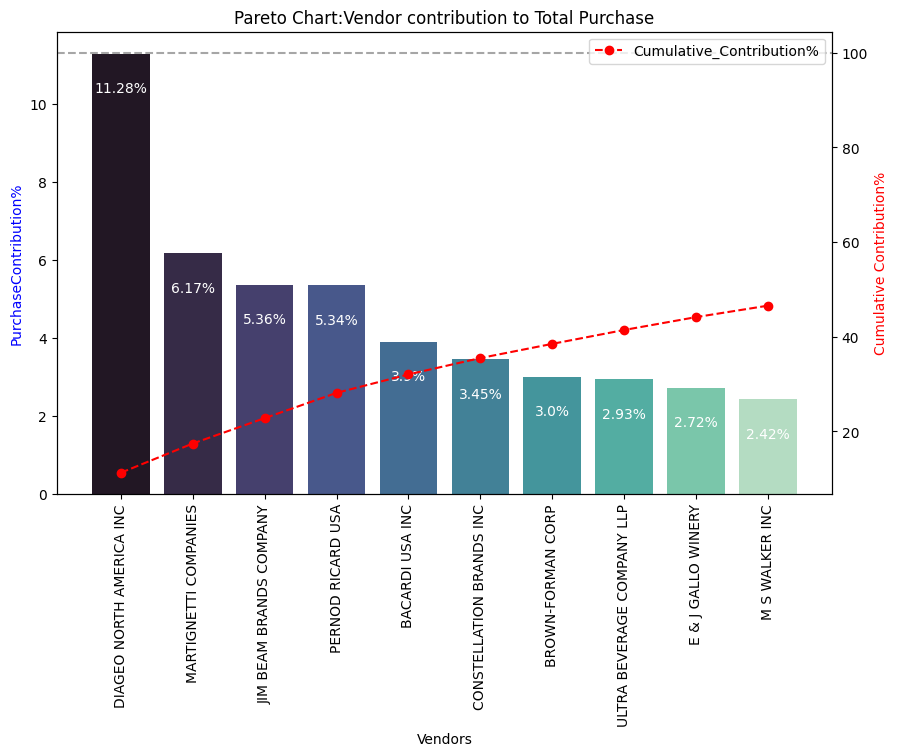

In [75]:
fig,ax1=plt.subplots(figsize=(10,6))
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['PurchaseContribution%'],palette='mako',ax=ax1)
for i,value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='white')
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Cumulative_Contribution%'],color='red',marker='o',linestyle='dashed',label='Cumulative_Contribution%')
ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('PurchaseContribution%',color='blue')
ax2.set_ylabel('Cumulative Contribution%',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart:Vendor contribution to Total Purchase')
ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')
plt.show()

**How much of total procurement is dependent on the Top vendors**

In [79]:
print(f"Total purchase contribution of top 10 vendors:{round(top_vendors['PurchaseContribution%'].sum(),2)}%")


Total purchase contribution of top 10 vendors:46.57%


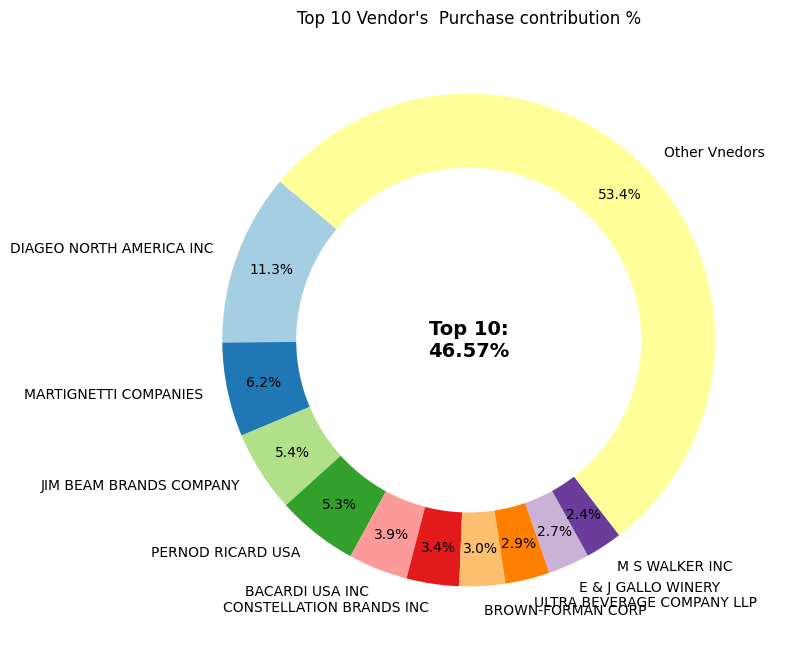

In [84]:
vendors=list(top_vendors['VendorName'].values)
purchase_contributions=list(top_vendors['PurchaseContribution%'].values)
total_contribution=sum(purchase_contributions)
remaining_contribution=100-total_contribution
#Append "other vendors" category
vendors.append('Other Vnedors')
purchase_contributions.append(remaining_contribution)
#Donut Chart
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotexts=ax.pie(purchase_contributions,labels=vendors,autopct='%1.1f%%',startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

#Draw a white circle in the center to create a "donut" effect
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0,0,f"Top 10:\n{total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')
plt.title(f"Top 10 Vendor's  Purchase contribution %")
plt.show()

**Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost saving?**

In [85]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [86]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [87]:
df['OrderSize']=pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['Small','Medium','Large'])

In [89]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
10687,Small,2
10688,Small,6
10689,Small,2
10690,Small,1


In [91]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,43.776954
Medium,17.894005
Large,11.308807


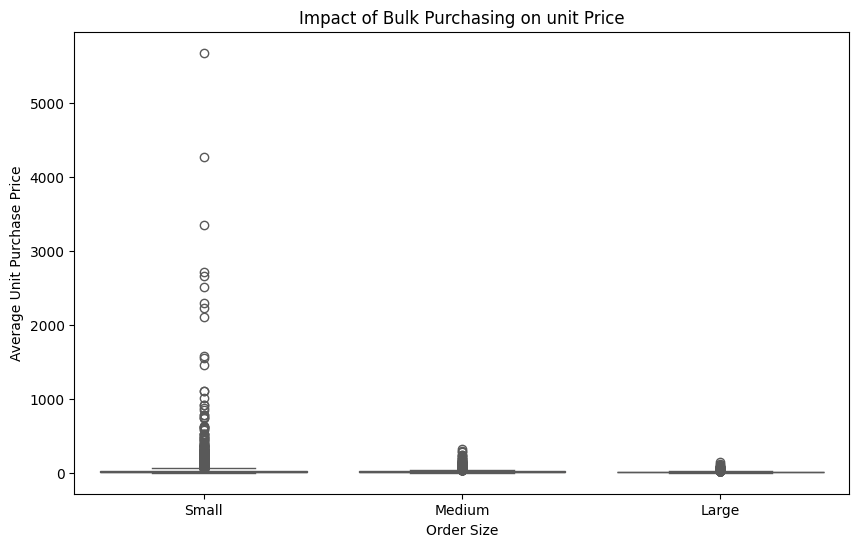

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='OrderSize',y='UnitPurchasePrice',palette="Set2")
plt.title('Impact of Bulk Purchasing on unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

Vendors buying in bulk(Large order size) get the lowest unit price ($11.30 per unit) meaning higher margins if they can manage inventory efficiently
The price difference small and large orders is substantial(~70% reduction in unit price)
This suggest that bulk pricing strategies successfully encourage vendorsto purchase in large volumes,leadingto higher overall sales despite lower per-unit revenue

In [95]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values(by='StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
AAPER ALCOHOL & CHEMICAL CO,0.000000
LAUREATE IMPORTS CO,0.000000
TRUETT HURST,0.041667
"IRA GOLDMAN AND WILLIAMS, LLP",0.075000
HIGHLAND WINE MERCHANTS LLC,0.148920
UNCORKED,0.217238
MILTONS DISTRIBUTING CO,0.236111
VINEYARD BRANDS LLC,0.256241
LOYAL DOG WINERY,0.308333


**How much capital is locked in unsold inventory per vendors  and which vendors contribute most to it?**

In [96]:
df['UnsoldInventoryValue']=(df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print(f"Total Unsold capital:{format_dollars(df['UnsoldInventoryValue'].sum())}")

Total Unsold capital:8.75M


In [97]:
#Aggregate capital locked per vendor
inventory_value_per_vendor=df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()
#Sort values with highest locked capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
28,DIAGEO NORTH AMERICA INC,980.09k
63,MARTIGNETTI COMPANIES,928.99k
50,JIM BEAM BRANDS COMPANY,857.80k
114,ULTRA BEVERAGE COMPANY LLP,780.27k
73,PERFECTA WINES,571.81k
74,PERNOD RICARD USA,554.74k
59,M S WALKER INC,469.96k
125,WILLIAM GRANT & SONS INC,436.49k
33,E & J GALLO WINERY,315.20k
14,BROWN-FORMAN CORP,284.91k


**What is 95% confidence interval for profit margins of top-performing and low performing vendors**

In [100]:
top_threshold=df['TotalSalesDollars'].quantile(0.75)
low_threshold=df['TotalSalesDollars'].quantile(0.25)

In [101]:
top_vendors=df[df['TotalSalesDollars']>top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['TotalSalesDollars']<low_threshold]['ProfitMargin'].dropna()

In [109]:
def confidence_interval(data,confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1)/np.sqrt(len(data))#standard error
    t_critical=stats.t.ppf((1+confidence)/2,df=len(data)-1)
    margin_of_error=t_critical*std_err
    return mean_val,mean_val-margin_of_error,mean_val+margin_of_error
                                    
                                        
    

In [110]:
top_mean,top_lower,top_upper=confidence_interval(top_vendors)
low_mean,low_lower,low_upper=confidence_interval(low_vendors)
print(f'Top Vendors 95% CI:({top_lower:.2f},{top_upper:.2f}),Mean{top_mean:.2f}')
print(f'Low Vendors 95% CI:({low_lower:.2f},{low_upper:.2f}),Mean{low_mean:.2f}')

Top Vendors 95% CI:(29.53,30.55),Mean30.04
Low Vendors 95% CI:(nan,nan),Mean-inf
